In [2]:
import anndata as ad
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scanpy as sc

# Imputation of missing values in the JUMP dataset

This notebook should prepare the JUMP TARGET2 data for downstream usage by removing `inf`, imputing `nan` values and removing certain features.

**Read the data**

In [3]:
data_file = "../../data/jump/jump_target2.h5ad"
if not os.path.exists(data_file):
    raise FileNotFoundError("Please create the anndata object by running data/jump/download_jump.py and subsetting it to the TARGET2 plates")

In [4]:
adata = sc.read_h5ad(data_file)
print(adata)
adata.obs.head()

AnnData object with n_obs × n_vars = 64464 × 4762
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'Metadata_WellType', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration', 'Metadata_Excitation_Low_DNA', 'Metadata_Excitation_Low_ER', 'Metadata_Excitation_Low_RNA', 'Metadata_Excitation_Low_AGP', 'Metadata_Excitation_Low_Mito', 'Metadata_Excitation_High_DNA', 'Metadata_Excitation_High_ER', 'Metadata_Excitation_High_RNA', 'Metadata_Excitation_High_AGP', 'Metadata_Excitation_High_Mito', 'Metadata_Emission_Low_DNA', 'Metadata_Emission_Low_ER', 'Metadata_Emission_Low_RNA', 'Metadata_Emission_Low_AGP', 'Metadata_Emission_Low_Mito', 'Metadata_Emission_High_DNA', 'Metada

,Metadata_JCP2022,Metadata_InChIKey,Metadata_InChI,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_PlateType,Metadata_WellType,Metadata_Microscope_Name,Metadata_Widefield_vs_Confocal,...,Metadata_Emission_High_Mito,Metadata_FPBase_Config,broad_sample,InChIKey,pert_iname,pubchem_cid,target,pert_type,control_type,smiles
0,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210726-160150,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210727-153003,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210803-153958,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210809-134534,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210810-173723,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove features from the blocklist**

See https://github.com/cytomining/pycytominer/blob/838ac2eee8bee09b50a1ec8077201c01f7882c69/pycytominer/data/blocklist_features.txt

In [5]:
blocklist = pd.read_table("../../data/jump/blocklist_features.txt")
blocklist.head()

,blocklist
0,Nuclei_Correlation_Manders_AGP_DNA
1,Nuclei_Correlation_Manders_AGP_ER
2,Nuclei_Correlation_Manders_AGP_Mito
3,Nuclei_Correlation_Manders_AGP_RNA
4,Nuclei_Correlation_Manders_DNA_AGP


In [7]:
adata = adata[:, [i for i in adata.var.index.values if i not in blocklist.blocklist.values]]
adata

View of AnnData object with n_obs × n_vars = 64464 × 4707
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'Metadata_WellType', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration', 'Metadata_Excitation_Low_DNA', 'Metadata_Excitation_Low_ER', 'Metadata_Excitation_Low_RNA', 'Metadata_Excitation_Low_AGP', 'Metadata_Excitation_Low_Mito', 'Metadata_Excitation_High_DNA', 'Metadata_Excitation_High_ER', 'Metadata_Excitation_High_RNA', 'Metadata_Excitation_High_AGP', 'Metadata_Excitation_High_Mito', 'Metadata_Emission_Low_DNA', 'Metadata_Emission_Low_ER', 'Metadata_Emission_Low_RNA', 'Metadata_Emission_Low_AGP', 'Metadata_Emission_Low_Mito', 'Metadata_Emission_High_DNA',

**Replace `inf` by `nan`**

In [8]:
adata.X[np.isinf(adata.X)] = np.nan

/tmp/ipykernel_270/3605372945.py:1: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  adata.X[np.isinf(adata.X)] = np.nan


**Remove feature with high nan fraction**

Start by getting an overview of the fraction of `nans` per feature.

In [11]:
percentages = np.isnan(adata.X).sum(axis=0) * 100 / adata.X.shape[0]
max(percentages)

8.697877885331348

In [13]:
np.sort(percentages[percentages > 0])

array([0.00930752, 0.00930752, 0.00930752, 0.00930752, 0.00930752,
       0.00930752, 0.01706379, 0.02016629, 0.02016629, 1.70172499,
       8.69787789])

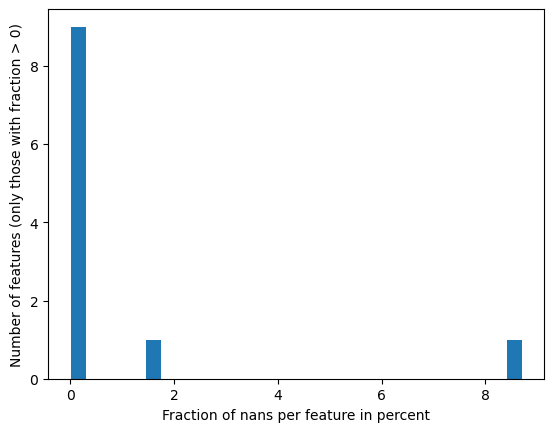

In [44]:
plt.hist(percentages[percentages > 0], bins = 30)
plt.xlabel("Fraction of nans per feature in percent")
plt.ylabel("Number of features (only those with fraction > 0)")
plt.show()

In [14]:
adata.var.index.values[np.where(percentages == np.max(percentages))[0][0]]

'Cells_AreaShape_FormFactor'

We see that only 11 features contain `nan` values and for all but two the fraction is below 0.03%. One feature (Cells_AreaShape_FormFactor) has a quite high `nan` fraction of about 8.7% which is why we decided to remove it.

In [16]:
adata = adata[:, [i for i in adata.var.index.values if i != "Cells_AreaShape_FormFactor"]]
adata

View of AnnData object with n_obs × n_vars = 64464 × 4706
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'Metadata_WellType', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration', 'Metadata_Excitation_Low_DNA', 'Metadata_Excitation_Low_ER', 'Metadata_Excitation_Low_RNA', 'Metadata_Excitation_Low_AGP', 'Metadata_Excitation_Low_Mito', 'Metadata_Excitation_High_DNA', 'Metadata_Excitation_High_ER', 'Metadata_Excitation_High_RNA', 'Metadata_Excitation_High_AGP', 'Metadata_Excitation_High_Mito', 'Metadata_Emission_Low_DNA', 'Metadata_Emission_Low_ER', 'Metadata_Emission_Low_RNA', 'Metadata_Emission_Low_AGP', 'Metadata_Emission_Low_Mito', 'Metadata_Emission_High_DNA',

**Impute remaining `nans` by column-wise mean (per plate)**

In [19]:
has_nan = np.isnan(adata.X).any(axis=1)

In [22]:
nan_plates = adata.obs[has_nan].Metadata_Plate.unique()

In [27]:
nan_indices = np.where(np.isnan(adata.X))

In [42]:
for plate in nan_plates:
    col_means = np.nanmean(adata[adata.obs.Metadata_Plate==plate].X, axis=0)
    plate_rows = np.where(adata.obs.Metadata_Plate==plate)[0]
    mask = [i in plate_rows for i in nan_indices[0]]
    plate_nan_indices = (nan_indices[0][mask], nan_indices[1][mask])
    adata.X[plate_nan_indices] = np.take(col_means, plate_nan_indices[1])

/tmp/ipykernel_270/1948909870.py:6: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  adata.X[plate_nan_indices] = np.take(col_means, plate_nan_indices[1])


In [47]:
sum(sum(np.isnan(adata.X)))

0

Save the resulting anndata object as h5ad

In [ ]:
adata.write("../../data/jump/jump_target2_imputed.h5ad")